In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_dtframe = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\site6_band_statistic.csv")
file_dtframe

,Unnamed: 0,weighted_sla,weighted_la,weighted_LDMC,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,b6_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,site6_q_1,97.993287,5.207945,0.855609,0.003085,0.006895,0.008266,0.011091,0.013567,0.014470,...,0.059900,0.051479,0.045845,0.045289,0.050981,0.044058,0.047574,0.047092,0.042398,0.064244
1,site6_q_10,67.449010,0.387745,1.292386,0.002745,0.003034,0.003563,0.002885,0.004746,0.006109,...,0.030065,0.035449,0.050129,0.051719,0.054364,0.052306,0.050712,0.046445,0.050798,0.054407
2,site6_q_11,109.157701,34.834276,0.492626,0.000852,0.001243,0.001300,0.001900,0.002313,0.003788,...,0.050410,0.048524,0.035549,0.036147,0.045051,0.040062,0.038802,0.040452,0.044717,0.062703
3,site6_q_2,97.318287,18.487914,0.380857,0.001883,0.004552,0.005339,0.009010,0.011587,0.013756,...,0.040810,0.036970,0.024927,0.026767,0.024191,0.051995,0.027982,0.026825,0.031034,0.045559
4,site6_q_3,93.647522,7.037150,0.372395,0.002346,0.003304,0.004541,0.007759,0.009294,0.011041,...,0.039503,0.033722,0.023706,0.025587,0.030969,0.028866,0.022222,0.018224,0.027983,0.041257
5,site6_q_6,97.080215,11.953308,0.460407,0.000474,0.003555,0.005241,0.007608,0.008677,0.009794,...,0.028041,0.027656,0.021054,0.019241,0.022796,0.018238,0.017797,0.021156,0.021885,0.032827
6,site6_q_8,83.864292,6.134349,1.607404,0.002891,0.003770,0.005975,0.007441,0.008586,0.010644,...,0.029016,0.025141,0.021974,0.022875,0.023644,0.026692,0.022467,0.021704,0.025153,0.046095
7,site6_q_9,77.645678,2.892549,0.488056,0.005129,0.004663,0.005705,0.007461,0.009373,0.011605,...,0.030676,0.031721,0.026197,0.023230,0.031742,0.023222,0.025916,0.024145,0.028028,0.039476


In [3]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
# band_name

In [4]:
y_weighted_sla = file_dtframe['weighted_sla']
y_weighted_la = file_dtframe['weighted_la']
y_weighted_LDMC = file_dtframe['weighted_LDMC']
x = file_dtframe[band_name]
x

,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,b6_mean,b7_mean,b8_mean,b9_mean,b10_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,0.003085,0.006895,0.008266,0.011091,0.013567,0.014470,0.016435,0.018875,0.023067,0.027760,...,0.059900,0.051479,0.045845,0.045289,0.050981,0.044058,0.047574,0.047092,0.042398,0.064244
1,0.002745,0.003034,0.003563,0.002885,0.004746,0.006109,0.007421,0.008415,0.010886,0.017170,...,0.030065,0.035449,0.050129,0.051719,0.054364,0.052306,0.050712,0.046445,0.050798,0.054407
2,0.000852,0.001243,0.001300,0.001900,0.002313,0.003788,0.004563,0.005308,0.008322,0.014422,...,0.050410,0.048524,0.035549,0.036147,0.045051,0.040062,0.038802,0.040452,0.044717,0.062703
3,0.001883,0.004552,0.005339,0.009010,0.011587,0.013756,0.014460,0.017348,0.022274,0.025670,...,0.040810,0.036970,0.024927,0.026767,0.024191,0.051995,0.027982,0.026825,0.031034,0.045559
4,0.002346,0.003304,0.004541,0.007759,0.009294,0.011041,0.011926,0.013950,0.018317,0.023585,...,0.039503,0.033722,0.023706,0.025587,0.030969,0.028866,0.022222,0.018224,0.027983,0.041257
5,0.000474,0.003555,0.005241,0.007608,0.008677,0.009794,0.011583,0.013220,0.016566,0.021453,...,0.028041,0.027656,0.021054,0.019241,0.022796,0.018238,0.017797,0.021156,0.021885,0.032827
6,0.002891,0.003770,0.005975,0.007441,0.008586,0.010644,0.011214,0.012782,0.016970,0.021686,...,0.029016,0.025141,0.021974,0.022875,0.023644,0.026692,0.022467,0.021704,0.025153,0.046095
7,0.005129,0.004663,0.005705,0.007461,0.009373,0.011605,0.012859,0.015929,0.020018,0.027302,...,0.030676,0.031721,0.026197,0.023230,0.031742,0.023222,0.025916,0.024145,0.028028,0.039476


In [12]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=2)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=2)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

100% completed
Suggested number of components:  2



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

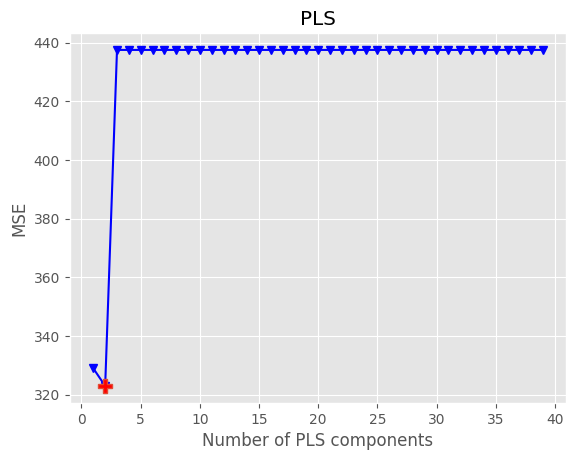

90.519499105 67.44900992 109.1577012 (8,)
77.59413147110381 71.83992723196755 86.68589808933562 (8,)
0.17863357630829257 0.6721190712628549
R2 calib: 0.782
R2 CV: -1.076
MSE calib: 33.858
MSE CV: 322.943


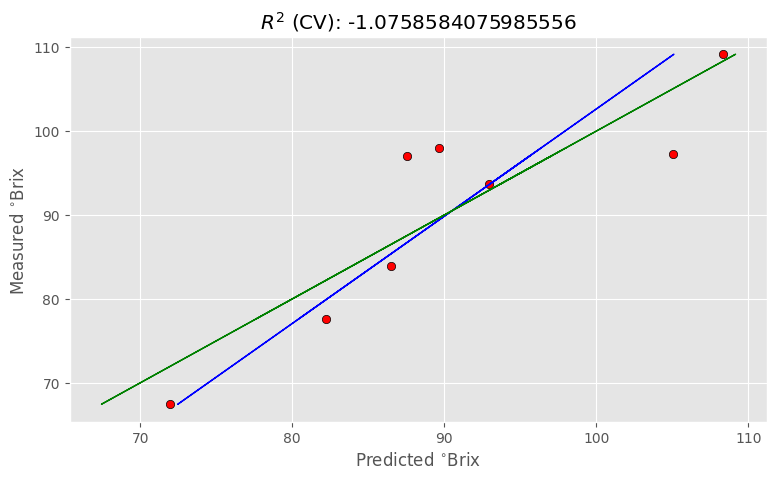

In [13]:
optimise_pls_cv(x,y_weighted_sla, 40, plot_components=True)

45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

100% completed
Suggested number of components:  4



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

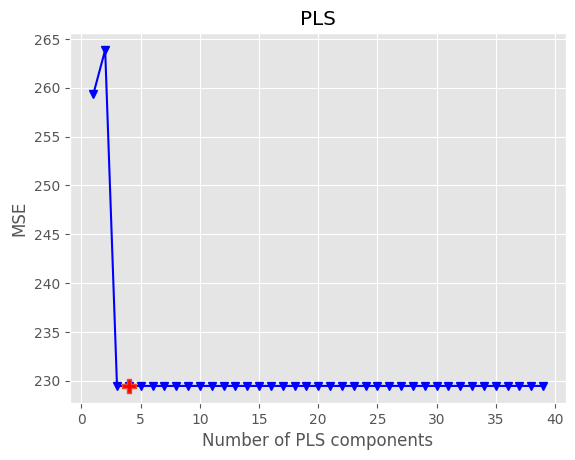

10.866904444125 0.387745098 34.83427559 (8,)
4.613356514706747 -5.085090093958315 16.062925395025477 (8,)
-0.2199161946005188 0.6007590368556661
R2 calib: 0.973
R2 CV: -1.095
MSE calib: 2.969
MSE CV: 229.473


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")


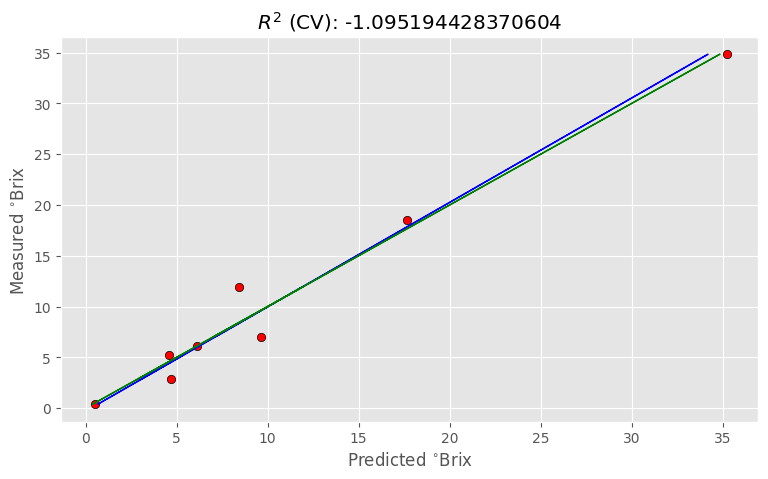

In [14]:
optimise_pls_cv(x,y_weighted_la, 40, plot_components=True)

47% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

100% completed
Suggested number of components:  1



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

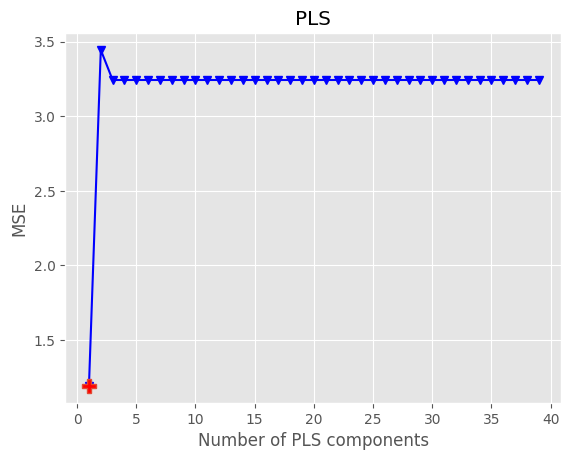

0.7437175111250001 0.372395276 1.607403963 (8,)
0.5903888436567938 -1.3844330506256908 3.0710959945904723 (8,)
0.47648862995784697 0.23260140607049437
R2 calib: 0.360
R2 CV: -5.200
MSE calib: 0.123
MSE CV: 1.192


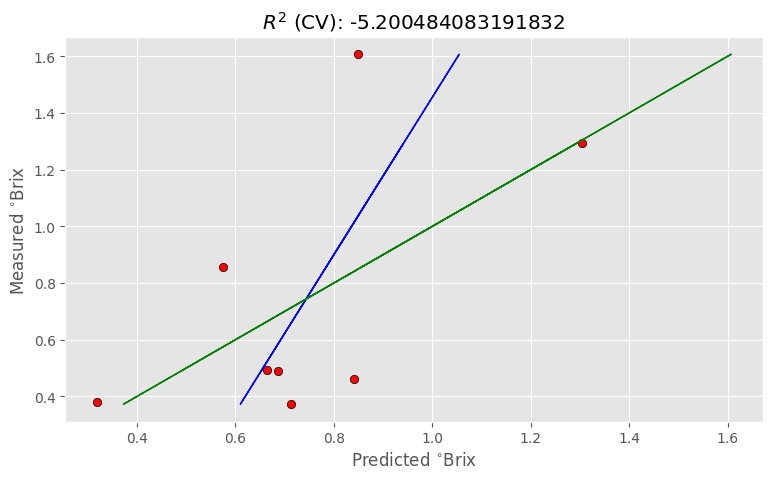

In [15]:
optimise_pls_cv(x,y_weighted_LDMC, 40, plot_components=True)

In [16]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

77% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

100% completed
Suggested number of components:  1



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

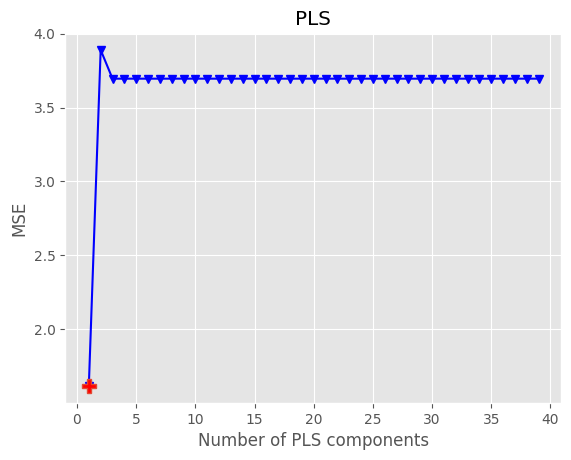

-0.447367174279901 -0.9877994189443241 0.4746204322656329 (8,)
-0.8108732379872421 -3.067499881223257 1.6317942090180602 (8,)
0.4410157101154287 0.27405858306383507
R2 calib: 0.402
R2 CV: -4.766
MSE calib: 0.167
MSE CV: 1.614


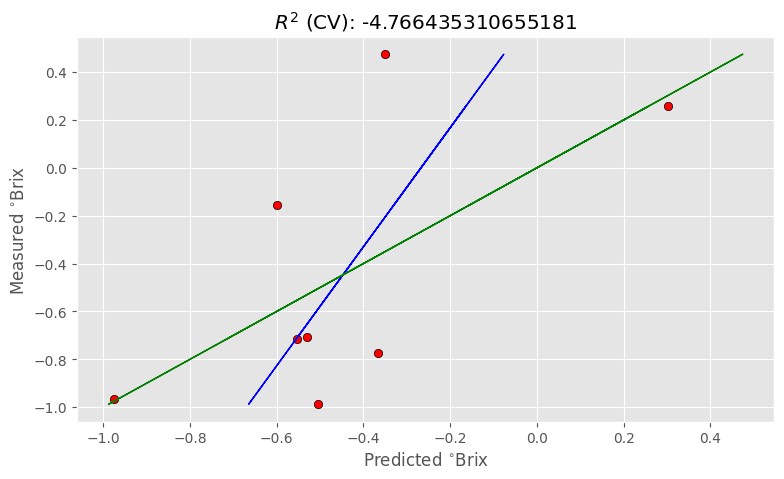

In [17]:
optimise_pls_cv(x,log_y_weighted_LDMC, 40, plot_components=True)

42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  war

80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  war

100% completed
Suggested number of components:  2



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 4
  war

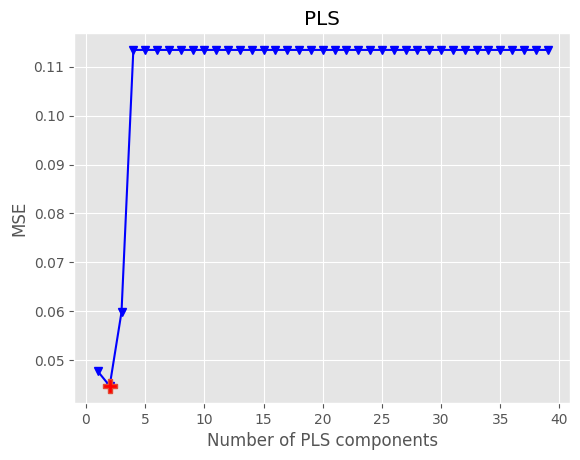

4.4954353517135015 4.21137190382105 4.692793636622425 (8,)
4.347863460707764 4.273437989041042 4.435681973396466 (8,)
0.08363483442153494 0.8439144106201576
R2 calib: 0.777
R2 CV: -1.134
MSE calib: 0.005
MSE CV: 0.045


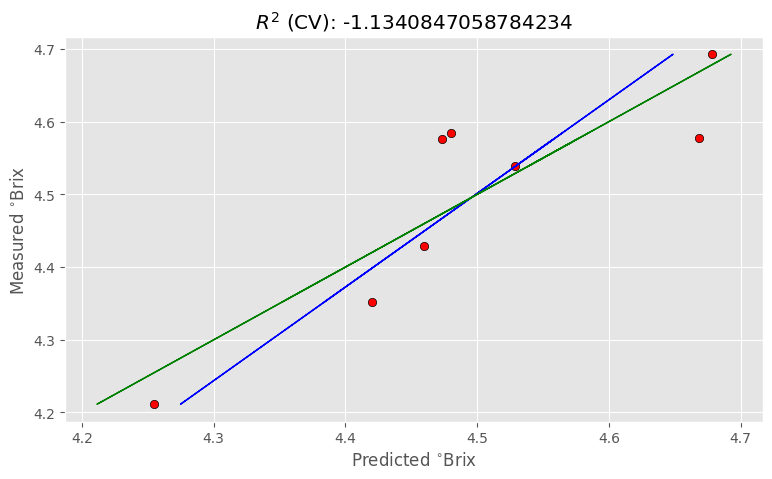

In [18]:
optimise_pls_cv(x,log_y_weighted_sla, 40, plot_components=True)

50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

87% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

100% completed
Suggested number of components:  2



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 3
  war

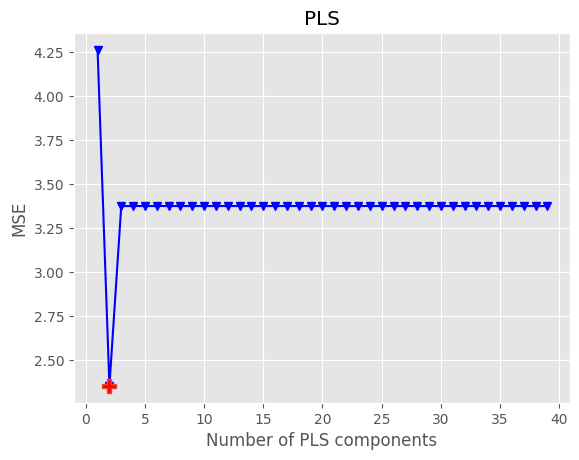

1.809843824895069 -0.947407119171746 3.5506018328015214 (8,)
1.4638989738896737 0.7778083040993047 2.090131742026786 (8,)
-0.37272686576001646 0.3631659791901922
R2 calib: 0.875
R2 CV: -0.458
MSE calib: 0.201
MSE CV: 2.354


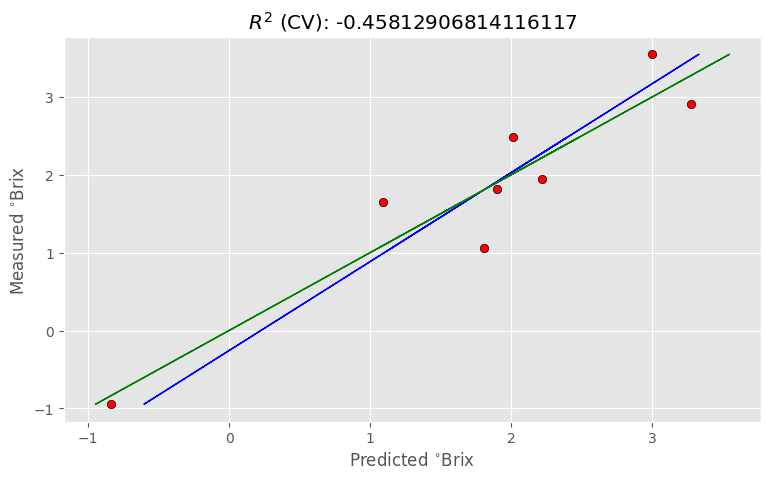

In [19]:
optimise_pls_cv(x,log_y_weighted_la, 40, plot_components=True)